<h1 align="center">Natural Language Processing </h1>
<h3 align="center">Assignmnet 1</h3>
<h3 align="center">Roll no: 17210112</h3>
<h3 align="center">Name: Twinkle Panchal
  </h3>                          
                       


<ul><li>I have processed **Shakespeare's** novel.</li>
<li>The text file is taken directly as **URL**.</li>

In [121]:
import nltk
from urllib2 import urlopen, Request
url = "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt"
file_txt= urlopen(url).read()
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
file_txt = file_txt.decode('utf-8')
tokens = tokenizer.tokenize(file_txt)    #this function ignore's punctuations and generate tokens

In [122]:
print "Total token count:", len(tokens)


Total token count: 929396


In [123]:
print "vocabulary size or token types:", len(set(tokens))  

vocabulary size or token types: 29672


In [124]:
print "TTR for corpus:", len(set(tokens))/ float(len(tokens))  

TTR for corpus: 0.0319261111518


In [125]:
tokenCount = nltk.FreqDist(tokens)
print tokenCount

<FreqDist with 29672 samples and 929396 outcomes>


In [126]:
print tokenCount.most_common(50)

[(u'the', 23288), (u'I', 22225), (u'and', 18653), (u'to', 16373), (u'of', 15725), (u'a', 12796), (u'you', 12186), (u'my', 10839), (u'in', 10016), (u'd', 8954), (u'is', 8414), (u'that', 8343), (u'not', 8038), (u'me', 7752), (u's', 7487), (u'And', 7457), (u'with', 6802), (u'it', 6760), (u'be', 6412), (u'his', 6322), (u'your', 6014), (u'for', 5885), (u'this', 5478), (u'have', 5455), (u'him', 5175), (u'he', 5118), (u'thou', 4594), (u'will', 4524), (u'as', 4320), (u'The', 4029), (u'so', 4024), (u'but', 3666), (u'her', 3663), (u'thy', 3634), (u'all', 3458), (u'To', 3434), (u'do', 3306), (u'thee', 3162), (u'shall', 3128), (u'are', 3126), (u'by', 2984), (u'That', 2984), (u'on', 2978), (u'we', 2736), (u'no', 2714), (u'our', 2695), (u'But', 2613), (u'What', 2549), (u'll', 2409), (u'O', 2317)]


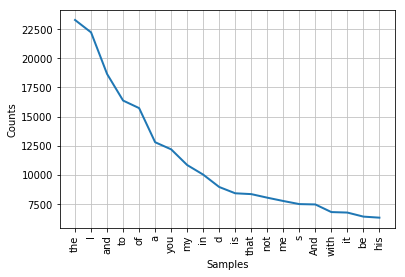

In [127]:
tokenCount.plot(20)             # ploting the zifp's law for most 20 words , which says f ∝ 1/r. 


In [128]:
from collections import defaultdict
CountFreq = defaultdict(int)
for word in tokenCount:
    CountFreq[tokenCount[word]]+=1

<h3> zipf's law : A relationship between the frequency of a word (f) and its position in the list
(its rank r). </h3>

<h2 align = 'center' >f ∝ $ \frac{1}{r} $

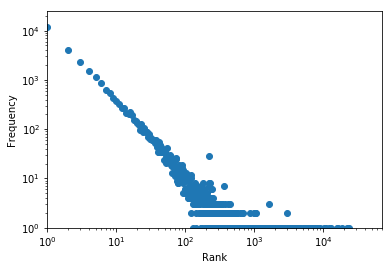

In [129]:
import matplotlib.pyplot as plt                                                           # plotting zipf's law

plt.scatter(CountFreq.keys(), CountFreq.values())
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0,25560)
plt.xlim(0,70000)
plt.show()

<h3> Zipf's law for length of a word</h3><h3>
it says length $l$ of word is inversly proposnal to the frequency of the word(f).</h3>
<h2 align='center'>$l ∝ \frac{1}{f}$</h2>





In [130]:
length_word=[]
frequencyofword=[]
for word in tokenCount:
    length_word.append((len(word)))
    
    frequencyofword.append((tokenCount[word]))


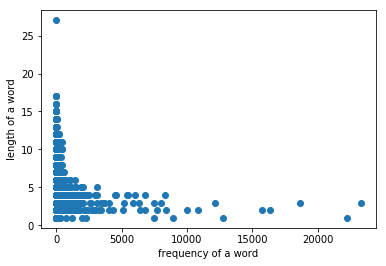

In [131]:
plt.scatter(frequencyofword,length_word)
plt.xlabel('frequency of a word')
plt.ylabel('length of a word')
plt.show()

<h3> Zipf's law for no of meanings of a word</h3><h3>
it says meanings of word $m$ is  proposnal to the rootsquare of frequency of the word</h3>
<h2 align='center'>$m ∝ \sqrt{f}$
</h2>

zipf's law for meanings does not hold true when the corpus differs from differs from novel to news article, because in the news article they use unique and very precise word which does not have ambiguous meanings and also have very less meanings around 2 or 3. But in the novel it does work but also depend on words, because some words with very high frequency can have very less no meanings. It is true for very common words like 'has', 'make','play'... so on
<h6></h6>
zipf's law for length does not hold true when the corpus differs from novel to some news article because news articles have all words with almost equal frequency.

In [132]:
from nltk.corpus import wordnet
No_of_meanings=[]
frequenc_word=[]
i=0;
for word in tokenCount:
    if(i==1000):
        break;
    i=i+1;
    syns = wordnet.synsets(word)
    No_of_meanings.append((len(syns)))
    frequenc_word.append((tokenCount[word]))



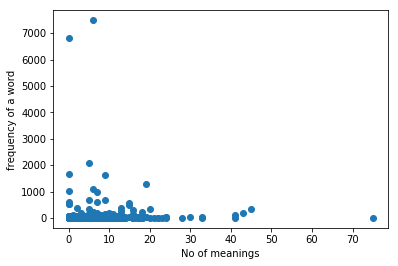

In [133]:
plt.scatter(No_of_meanings,frequenc_word)
plt.xlabel('No of meanings')
plt.ylabel('frequency of a word')
plt.show()

<h1>heaps law</h1>

<h3>I have taken set of first 500 words,first 1000 words , first 1500 words, first 2000 words and so on till length of tokens
then find the value of vocab(no of unique words) with increasing size of wordset(500,1000,1500....)</h3>
<h2>
The law says the size of vocabulary |V| and N be the number of tokens.</h2>
<h2 align='center'>$|V| = KN^B$</h2>
<h4>
so we can write this as</h4>
<h2>
$log(|V|) = log(K) +B*log(N)$ </h2><h4>which is of the form </h4><h2>
$Y = m*X+c$</h2> <h2>
m and c gives the value of K and B , which we can find with least square method for curve fitting.</h2>



In [ ]:
uniq_token =[]
for i in range(500,len(tokens),500):
    uniq_token.append(len(set(tokens[0:i])))
    

In [ ]:
total_token=[]
for i in range(500, len(tokens),500):
    total_token.append(i)

In [ ]:
plt.plot(total_token,uniq_token)
plt.xlabel('total tokens')
plt.ylabel('uniqe tokens')
plt.show()


In [ ]:
from math import log
import numpy as np
uniq=list(np.log(uniq_token))
total=list(np.log(total_token))
plt.scatter(total,uniq)
plt.xlabel('log(total_tokens)')
plt.ylabel('log(uniqe_tokens)')
plt.show()

In [ ]:

A = np.vstack([total, np.ones(len(total))]).T
m, c = np.linalg.lstsq(A, uniq)[0]

In [ ]:
m                                                  # value of B

In [109]:
c

3.0772197465755129

In [118]:
k = np.exp(c)  
k                                                  # value of K 

21.697992539691942

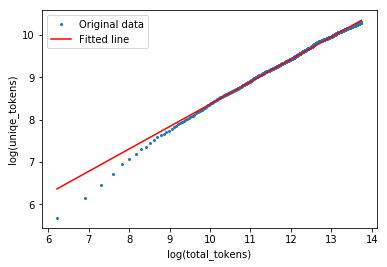

In [119]:
import matplotlib.pyplot as plt
plt.plot(total, uniq, 'o', label='Original data', markersize=2)
plt.plot(total, list(np.array(total)*m +c) , 'r', label='Fitted line')
plt.xlabel('log(total_tokens)')
plt.ylabel('log(uniqe_tokens)')
plt.legend()
plt.show()